In [4]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf



In [5]:
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX', 'META']
end = datetime.now()
start = end - timedelta(days=365*5)  # 5 years

data = {}  # Dictionary to store the data for each stock

for symbol in stock_list:
    # Download data for the current stock symbol
    stock_data = yf.download(symbol, start=start, end=end)
    data[symbol] = stock_data  # Store the data in the dictionary

# Access the data for each stock symbol
DF_AAPL = data['AAPL']
DF_GOOG = data['GOOG']
DF_MSFT = data['MSFT']
DF_AMZN = data['AMZN']
DF_NFLX = data['NFLX']
DF_META = data['META']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Daily Apple Stock prices (2018-2023)'}, xlabel='Date'>

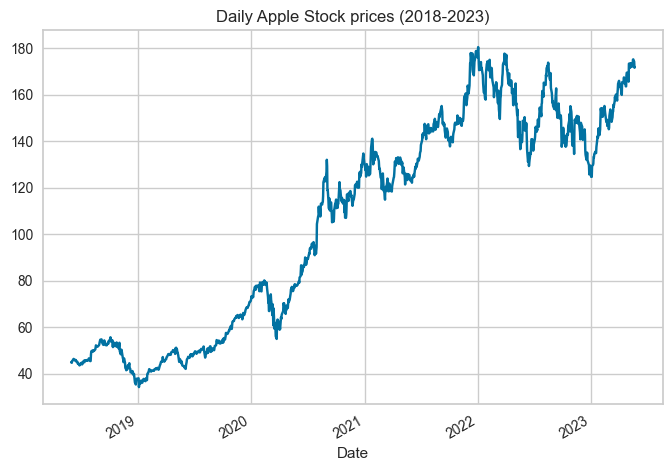

In [6]:
DF_AAPL['Adj Close'].plot(title="Daily Apple Stock prices (2019-2023)")

<Axes: title={'center': 'Daily Google Stock prices (2018-2023)'}, xlabel='Date'>

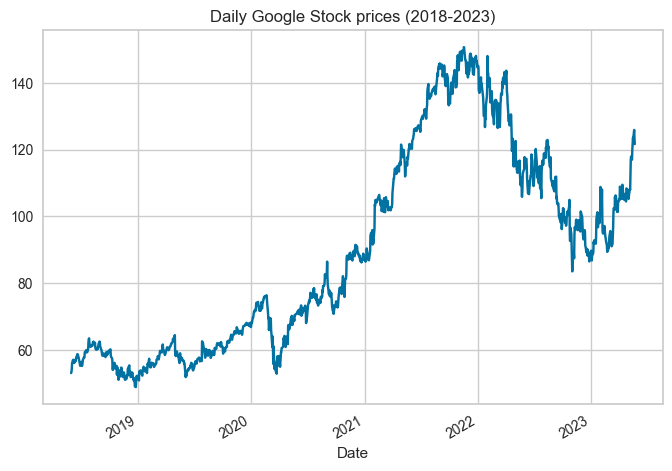

In [7]:
DF_GOOG['Adj Close'].plot(title="Daily Google Stock prices (2019-2023)")

<Axes: title={'center': 'Daily Microsoft Stock prices (2018-2023)'}, xlabel='Date'>

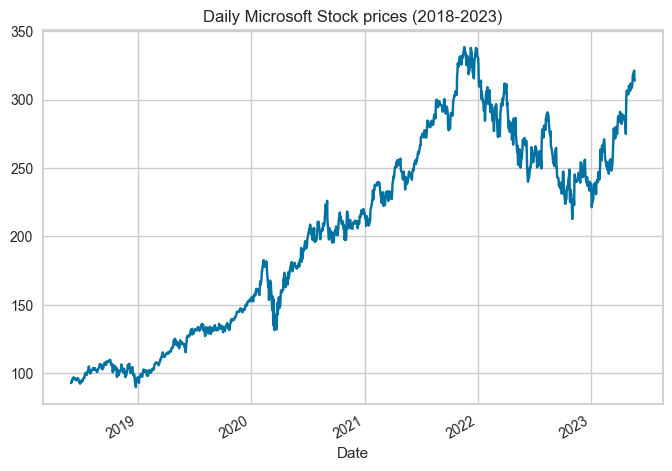

In [8]:
DF_MSFT['Adj Close'].plot(title="Daily Microsoft Stock prices (2019-2023)")

<Axes: title={'center': 'Daily Amazon Stock prices (2018-2023)'}, xlabel='Date'>

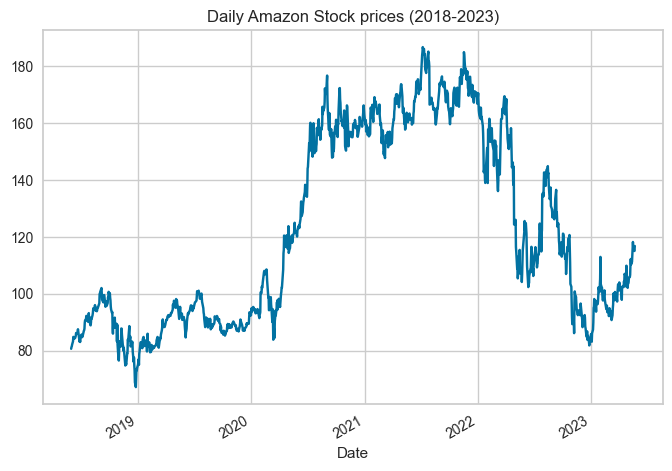

In [9]:
DF_AMZN['Adj Close'].plot(title="Daily Amazon Stock prices (2019-2023)")

<Axes: title={'center': 'Daily Netflix Stock prices (2018-2023)'}, xlabel='Date'>

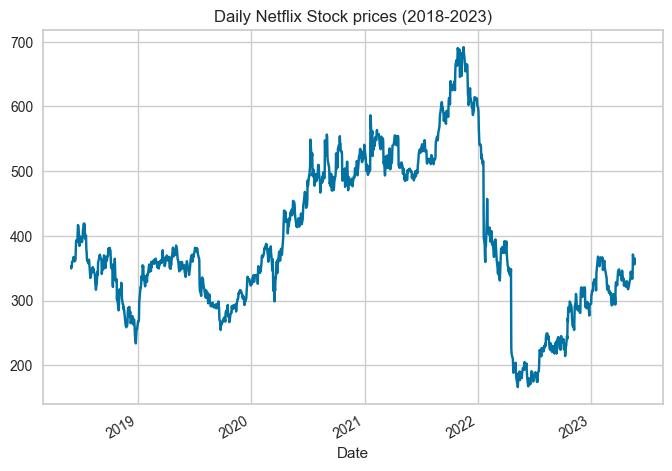

In [10]:
DF_NFLX['Adj Close'].plot(title="Daily Netflix Stock prices (2019-2023)")

<Axes: title={'center': 'Daily META Stock prices (2018-2023)'}, xlabel='Date'>

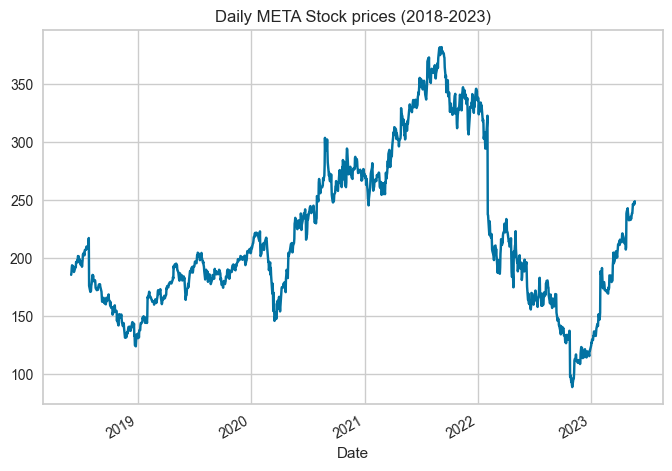

In [11]:
DF_META['Adj Close'].plot(title="Daily META Stock prices (2019-2023)")

### Identifying Value at Risk

In [12]:
RISKY_ASSETS = ["GOOG", "META"]
SHARES = [5, 5]
START_DATE = "2022-01-01"
END_DATE = "2022-12-31"
T = 1
N_SIMS = 10 ** 5

In [13]:
df = yf.download(RISKY_ASSETS, start=START_DATE,
    end=END_DATE)

[*********************100%***********************]  2 of 2 completed


<Axes: title={'center': "Googles's and Meta's daily stock returns in 2022"}, xlabel='Date'>

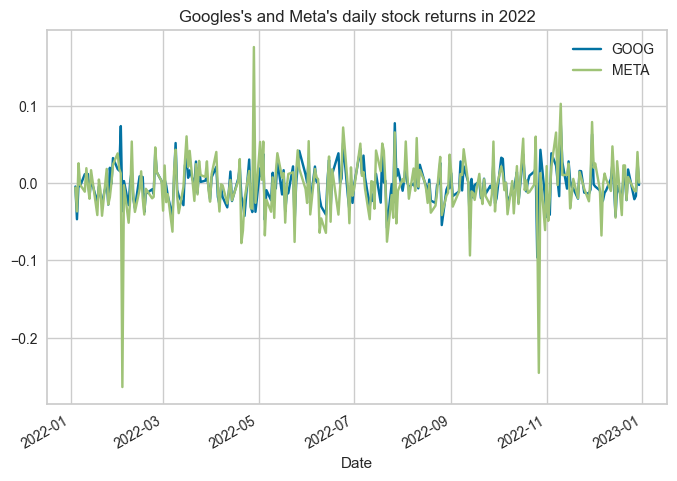

In [20]:
returns = df["Adj Close"].pct_change().dropna()
returns.plot(title="Googles's and Meta's daily stock returns in 2022")


In [15]:
cov_mat = returns.cov()
chol_mat = np.linalg.cholesky(cov_mat)
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(
    np.matmul(chol_mat, np.transpose(rv))
)
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = df["Adj Close"].values[-1, :]
P_0 = np.sum(SHARES * S_0)

S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T +
    sigma * np.sqrt(T) * correlated_rv)

P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)
for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: ${-y:.2f}')

1-day VaR with 99.99% confidence: $7.49
1-day VaR with 99.9% confidence: $6.94
1-day VaR with 99.0% confidence: $6.06


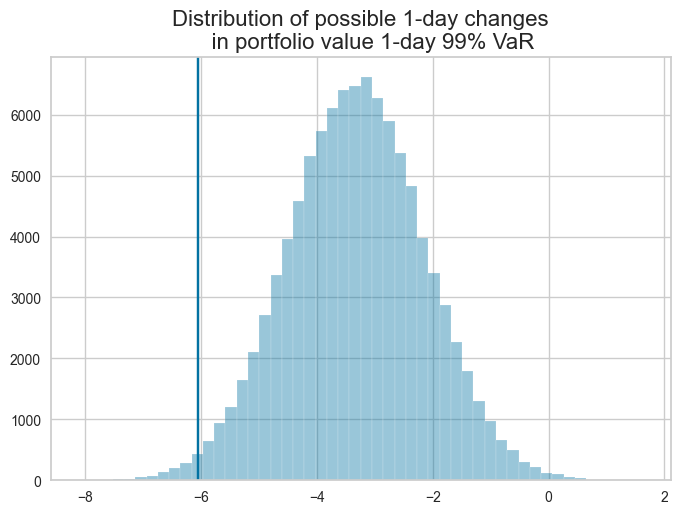

In [16]:
ax = sns.distplot(P_diff, kde=False)
ax.set_title("""Distribution of possible 1-day changes
    in portfolio value 1-day 99% VaR""", 
    fontsize=16)
ax.axvline(var[2], 0, 10000)

In [17]:
var = np.percentile(P_diff_sorted, 5)
expected_shortfall = P_diff_sorted[P_diff_sorted<=var].mean()
print(expected_shortfall)

-5.747358162990545


In [61]:
RISKY_ASSETS2 = ["AMZN", "NFLX"]
SHARES2 = [5, 5]
START_DATE2 = "2022-01-01"
END_DATE2 = "2022-12-31"
T2 = 1
N_SIMS2 = 10 ** 5

In [62]:
df_2 = yf.download(RISKY_ASSETS, start=START_DATE,
    end=END_DATE)

[*********************100%***********************]  2 of 2 completed


<Axes: title={'center': "Amazon's and Netflix's daily stock returns in 2022"}, xlabel='Date'>

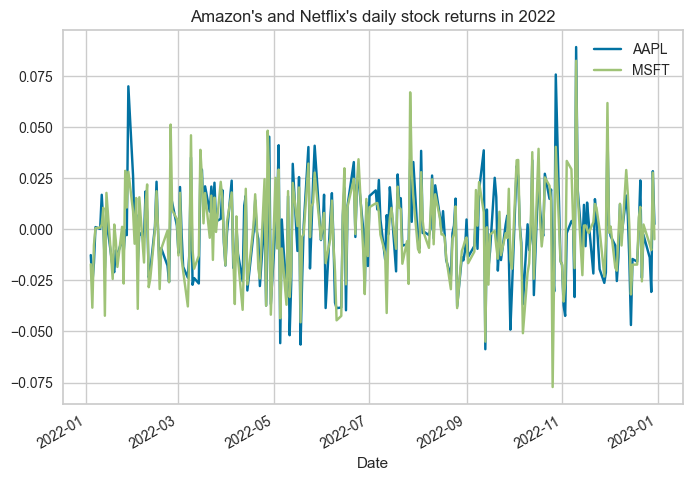

In [63]:
returns2 = df_2["Adj Close"].pct_change().dropna()
returns2.plot(title="Amazon's and Netflix's daily stock returns in 2022")

In [79]:
cov_mat2 = returns2.cov()
chol_mat2 = np.linalg.cholesky(cov_mat2)
rv2 = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv2 = np.transpose(
    np.matmul(chol_mat2, np.transpose(rv2))
)
r2 = np.mean(returns2, axis=0).values
sigma2 = np.std(returns2, axis=0).values
S_02 = df_2["Adj Close"].values[-1, :]
P_02 = np.sum(SHARES * S_02)

T2 = 1

S_T2 = S_02 * np.exp((r2 - 0.5 * sigma2 ** 2) * T2 +
                     sigma2 * np.sqrt(T2) * correlated_rv2)

P_T2 = np.sum(SHARES * S_T2, axis=1)
P_diff2 = P_T2 - P_02

P_diff_sorted2 = np.sort(P_diff2)
percentiles2 = [0.01, 0.1, 1.]
var2 = np.percentile(P_diff_sorted2, percentiles2)
for x2, y2 in zip(percentiles2, var2):
    print(f'1-day VaR with {100-x2}% confidence: ${-y2:.2f}')

1-day VaR with 99.99% confidence: $5.74
1-day VaR with 99.9% confidence: $5.16
1-day VaR with 99.0% confidence: $4.43


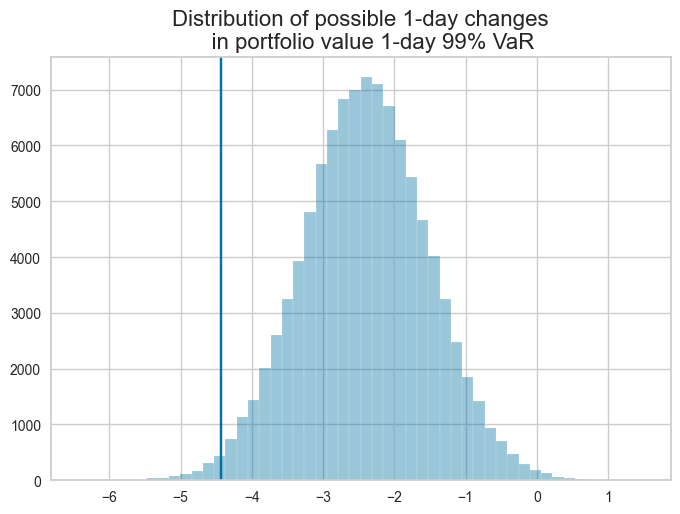

In [80]:
ax2 = sns.distplot(P_diff2, kde=False)
ax2.set_title("""Distribution of possible 1-day changes
    in portfolio value 1-day 99% VaR""", 
    fontsize=16)
ax2.axvline(var2[2], 0, 10000)

In [82]:
expected_shortfall2 = P_diff_sorted2[P_diff_sorted2 <= var2].mean()
print(expected_shortfall2)

-4.214556954232138


In [83]:
RISKY_ASSETS3 = ['AAPL', 'MSFT']
SHARES3 = [5, 5]
START_DATE3 = "2022-01-01"
END_DAT3E = "2022-12-31"
T3 = 1
N_SIMS3 = 10 ** 5

In [33]:
df_3 = yf.download(RISKY_ASSETS, start=START_DATE,
    end=END_DATE)

[*********************100%***********************]  2 of 2 completed


<Axes: title={'center': "Apples's and Microsoft's daily stock returns in 2022"}, xlabel='Date'>

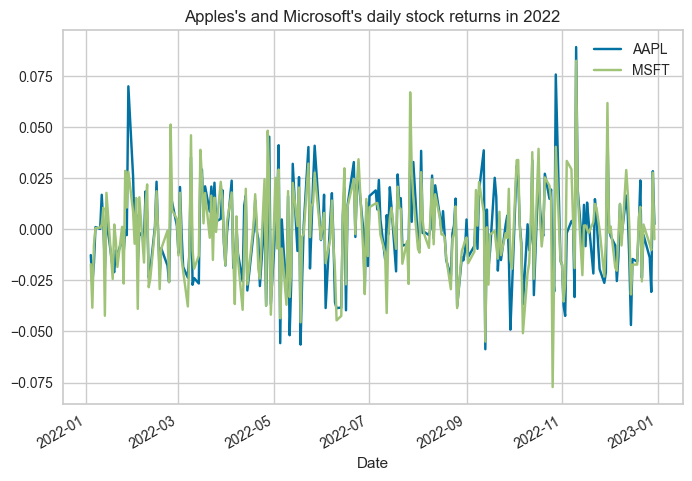

In [84]:
returns3 = df_3["Adj Close"].pct_change().dropna()
returns3.plot(title="Apples's and Microsoft's daily stock returns in 2022")

In [86]:
cov_mat3 = returns3.cov()
chol_mat3 = np.linalg.cholesky(cov_mat3)
rv3 = np.random.normal(size=(N_SIMS3, len(RISKY_ASSETS3)))
correlated_rv3 = np.transpose(
    np.matmul(chol_mat3, np.transpose(rv3))
)
r3 = np.mean(returns3, axis=0).values
sigma3 = np.std(returns3, axis=0).values
S_03 = df_3["Adj Close"].values[-1, :]
P_03 = np.sum(SHARES * S_03)

S_T3 = S_03 * np.exp((r3 - 0.5 * sigma3 ** 2) * T3 +
    sigma3 * np.sqrt(T3) * correlated_rv3)

P_T3 = np.sum(SHARES * S_T3, axis=1)
P_diff3 = P_T3 - P_03

P_diff_sorted3 = np.sort(P_diff3)
percentiles3 = [0.01, 0.1, 1.]
var3 = np.percentile(P_diff_sorted3, percentiles3)
for x3, y3 in zip(percentiles3, var3):
    print(f'1-day VaR with {100-x3}% confidence: ${-y3:.2f}')

1-day VaR with 99.99% confidence: $5.76
1-day VaR with 99.9% confidence: $5.14
1-day VaR with 99.0% confidence: $4.46


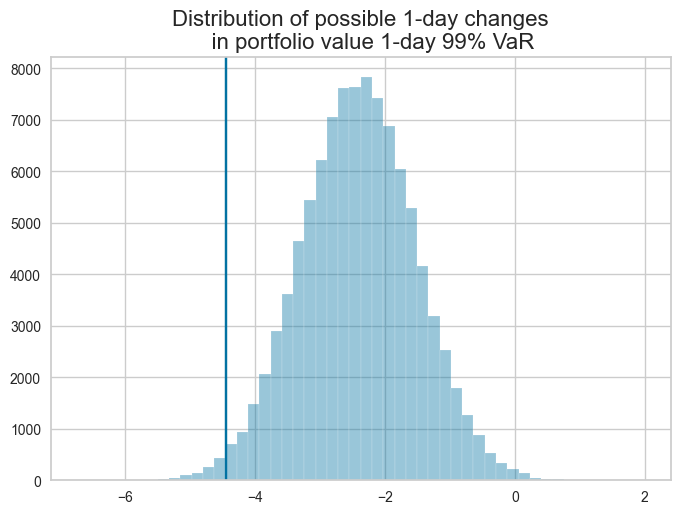

In [89]:
ax3 = sns.distplot(P_diff3, kde=False)
ax3.set_title("""Distribution of possible 1-day changes
    in portfolio value 1-day 99% VaR""", 
    fontsize=16)
ax3.axvline(var3[2], 0, 10000)

In [90]:
var3 = np.percentile(P_diff_sorted3, 5)
expected_shortfall3 = P_diff_sorted3[P_diff_sorted3 <= var3].mean()
print(expected_shortfall3)

-4.225665397847544
